Diffusion coefficient for soft0-rho90 @ 0.006: 4.84e-05 units^2/time


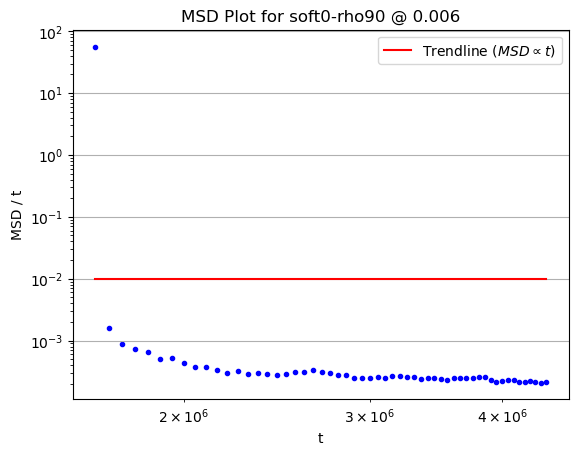

Diffusion coefficient for soft0-rho90 @ 0.008: 6.37e-05 units^2/time


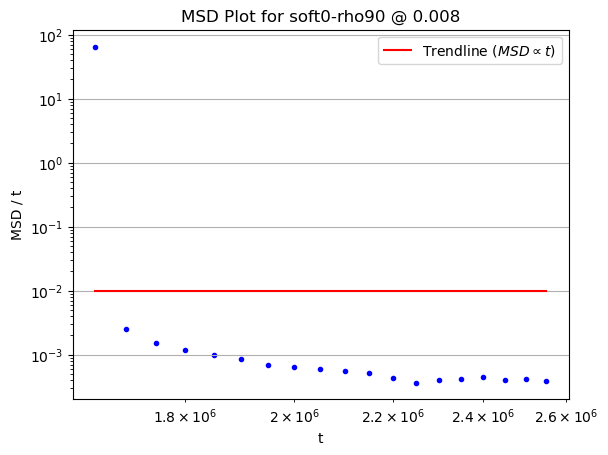

Diffusion coefficient for soft0-rho90 @ 0.010: 7.39e-05 units^2/time


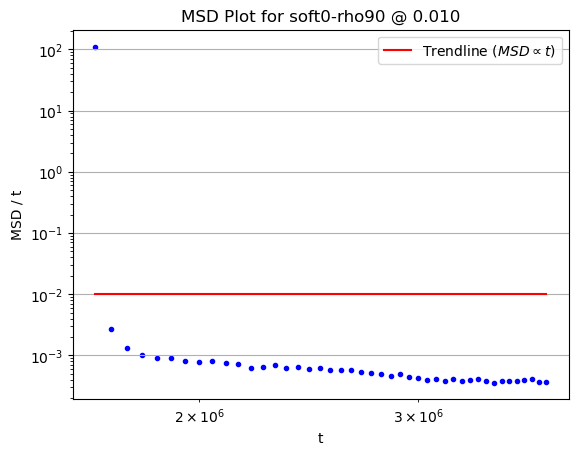

Diffusion coefficient for soft0-rho90 @ 0.012: 1.04e-04 units^2/time


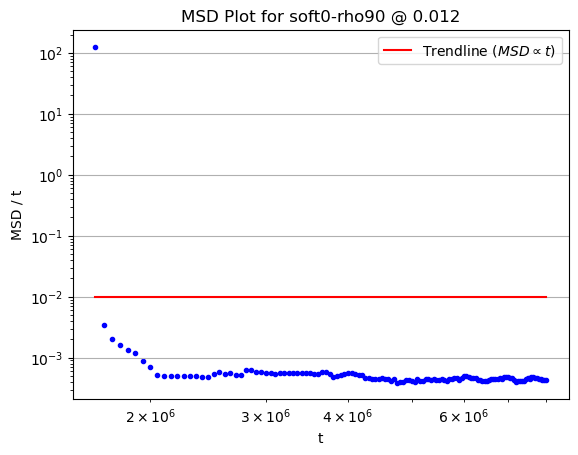

ValueError: too many values to unpack (expected 2)

<Figure size 640x480 with 0 Axes>

In [56]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

data_source = Path("rust") / "cell_data"
msd_source = "coms"

for motility in [dir for dir in (data_source / msd_source).iterdir() if dir.is_dir()]:
    for simulation in motility.iterdir():
        plt.figure()
        msd_data_file = simulation / "msd.txt"
        with open(msd_data_file, "r") as f:
            data = [tuple(map(float, line.split(","))) for line in f.readlines()]
            data = sorted(data, key=lambda x: x[0])
            x_points, y_points = zip(*data)

        x = np.array(x_points)
        y = np.array(y_points)
        plt.scatter(x, y / (x - x[0] + 1), marker=".", linestyle="-", color="b")

        slope, intercept = np.polyfit(x, y, 1)
        trendline = np.polyval([slope, intercept], x)

        plt.plot(
            x,
            np.ones(len(x)) * 10e-3,
            linestyle="-",
            color="r",
            label=f"Trendline ($MSD \propto t$)",
        )
        # plt.plot(
        #     x,
        #     x,
        #     linestyle="-",
        #     color="g",
        #     label=f"Trendline ($MSD \propto t^2$)",
        # )

        # set axes to log scale
        plt.yscale("log")
        plt.xscale("log")
        plt.xlabel("t")
        plt.ylabel("MSD / t")
        plt.title(f"MSD Plot for {simulation.name} @ {motility.name}")
        plt.grid(True)
        plt.legend()

        diffusion_coefficient = slope / 4
        print(
            f"Diffusion coefficient for {simulation.name} @ {motility.name}: {diffusion_coefficient:.2e} units^2/time"
        )

        plt.show()